In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 4)

# Dataset: 120 years of Olympic history: athletes and results

Basic bio data on athletes and medal results from Athens 1896 to Rio 2016.

**\*Obs:** Dataset obtido pelo [Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/data?select=athlete_events.csv).

## Dataset

In [2]:
df = pd.read_csv('datasets/athlete_events.csv')
df_noc = pd.read_csv('datasets/noc_regions.csv')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## Informações gerais do dataset

Este dataset possui 271116 linhas e 15 colunas. Cada linha representa as informação de um evento de um atleta. O ID é usado como identificador porque podem existir nome repetidos no dataset. NaN na coluna 'Medal' significa que o atleta não ganhou nenhuma medalha naquele evento. As informações são desde 1896 em Atenas até 2016 no Rio de Janeiro.

Os atributos são:
* ID - identificador do atleta
* Name - nome do atleta
* Sex - sexo do atleta (M e F)
* Age - idade do atleta
* Height - altura do atleta
* Weight - peso do atleta
* Team - país que o atleta representa
* NOC - National Olympic Committee
* Games - ano e temporada do evento
* Year - ano do evento
* Season - temporada do evento
* City - cidade em que aconteceu o evento
* Sport - esporte que o atleta participou
* Event - nome do evento
* Medal - medalha que o atleta ganhou (NaN, Gold, Bronze e Silver)

## Análise

É possível fazer algumas contagens para termos uma noção de sua distribuição.

### Contagem do número do tipo de sexo

Podemos ver nos gráficos abaixo que o número de homens participando de olímpidas é bem maior que o número de mulheres. Somente 27.5% de mulheres presente nas olímpiadas.

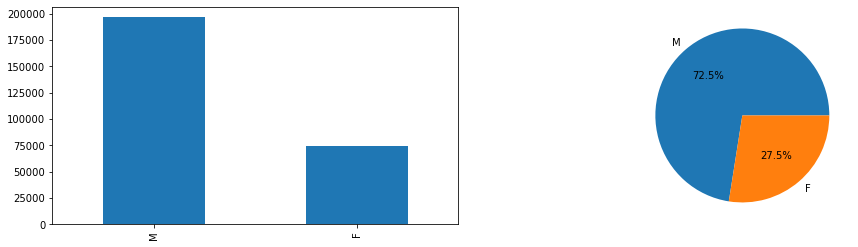

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df.Sex.value_counts().plot(kind='bar', ax=axes[0])
df.Sex.value_counts(normalize=True).plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_ylabel('')
plt.show()

### Análise a respeito das medalhas de ouro

<AxesSubplot:>

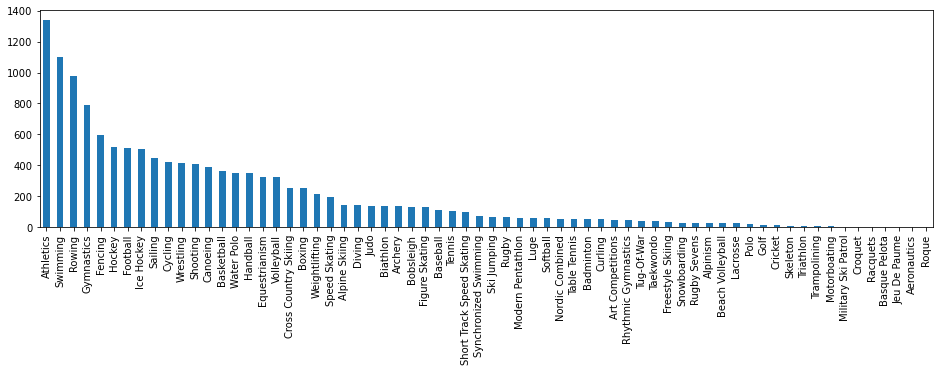

In [4]:
df_gold = df.loc[df['Medal'] == 'Gold']
df_gold.Sport.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Sex'>

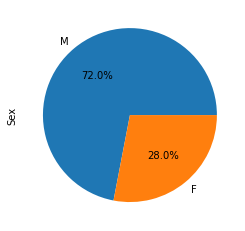

In [5]:
df_gold.Sex.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')

Podemos ver que a modalidade Atletismo é a que possui o maior número de medalhas de ouro. Esse resultado pode ser esperado porque Atletismo é um conjunto de esportes formado por várias modalidades: corrida, salto, marcha e lançamentos, portanto o número de medalhas de ouro é superior as demais. Podemos também observar que atletas do sexo masculino são os que mais possuem medalhas de ouro.

In [6]:
df_gold.City.value_counts().head()

London            1215
Athina             883
Los Angeles        726
Beijing            671
Rio de Janeiro     665
Name: City, dtype: int64

A tabela acima mostra o número de medalhistas de ouro por cidade. Em primeiro lugar temos a cidade de Londres e, como podemos ver, Rio de Janeiro ocupa a 5º posição nesse ranking. Vamos buscar mais informações a respeito do Rio de Janeiro.

<AxesSubplot:>

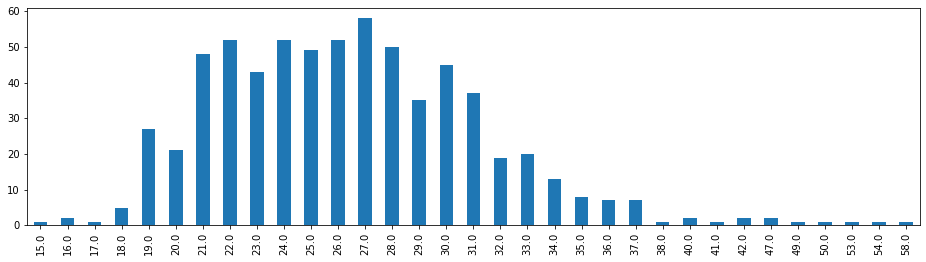

In [7]:
df_gold_rj = df_gold[df_gold['City'] == 'Rio de Janeiro']
df_gold_rj.Age.sort_values().value_counts(sort=False).plot(kind='bar')

A maioria dos medalhistas de ouro do Rio de Janeiro são jovens entre 21 e 30 anos.

### TODO

* Plot entre Team com duplas nacionalidades e o NOC
* **Aumento do número de atletas mulheres ao longo dos anos**
* Comparativo geral entre temporadas: Summer e Winter
* **Cálculo do IMC e análises**
* **Competidor que mais participou/mais ganhou**
* Sumário por olimpíada
* Cidade que já sediaram olimpíadas de Inverno e de Verão
* **Esportes que foram adicionados ao longo dos anos**
 - Barplot ao longo dos anos mostrando novas modalidades
* **Rio de Janeiro vs Atenas: fazer uma análise geral**